In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Data Science Lab 1/VoD_DSLab01.csv')
data.head()

,device_type,live_tv_id,request_url,request_method,time_received,user_loc,byte_sent,vod_encoding,time_to_serve,content_type,...,cachecontrol,method,response_status,user_id,host_id,vod_id,devicebrand,statuscode,user_agent,request_header
0,0.0,NaN,73218596,HTTP/1.1,2021-11-14 06:00:14+00:00,0,1542.095238,10.0,0.000274,video/mpeg,...,Cache-Control:max-age=31536000,GET,tcp_hit,NaN,4,2751.0,NaN,206,12.0,NaN
1,0.0,NaN,74962598,HTTP/1.1,2021-11-14 06:19:57+00:00,1816,70985.984127,1659.0,0.430289,video/mp4,...,Cache-Control:max-age=31536000,GET,tcp_hit,NaN,4,3031.0,NaN,206,12.0,NaN
2,0.0,NaN,74687485,HTTP/1.1,2021-11-14 06:21:14+00:00,944,65501.857143,2673.0,2.474124,video/mp4,...,Cache-Control:max-age=31536000,GET,tcp_hit,NaN,4,2978.0,NaN,206,12.0,NaN
3,0.0,NaN,73908576,HTTP/1.1,2021-11-14 06:21:18+00:00,0,73345.412698,2580.0,0.380959,video/mp4,...,Cache-Control:max-age=31536000,GET,tcp_hit,NaN,4,2868.0,NaN,206,12.0,NaN
4,0.0,NaN,74687475,HTTP/1.1,2021-11-14 06:22:01+00:00,944,1579.349206,2673.0,0.000244,video/mpeg,...,Cache-Control:max-age=31536000,GET,tcp_hit,NaN,4,2978.0,NaN,206,12.0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577063 entries, 0 to 1577062
Data columns (total 22 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   device_type      1268967 non-null  float64
 1   live_tv_id       0 non-null        float64
 2   request_url      1577063 non-null  int64  
 3   request_method   1577063 non-null  object 
 4   time_received    1577063 non-null  object 
 5   user_loc         1577063 non-null  int64  
 6   byte_sent        1577063 non-null  float64
 7   vod_encoding     1571865 non-null  float64
 8   time_to_serve    1577063 non-null  float64
 9   content_type     1577063 non-null  object 
 10  maxage           1567680 non-null  float64
 11  session_id       1577063 non-null  int64  
 12  cachecontrol     1577063 non-null  object 
 13  method           1577063 non-null  object 
 14  response_status  1577063 non-null  object 
 15  user_id          144863 non-null   float64
 16  host_id          1

In [ ]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())

device_type
False    1268967
True      308096
Name: device_type, dtype: int64
live_tv_id
True    1577063
Name: live_tv_id, dtype: int64
request_url
False    1577063
Name: request_url, dtype: int64
request_method
False    1577063
Name: request_method, dtype: int64
time_received
False    1577063
Name: time_received, dtype: int64
user_loc
False    1577063
Name: user_loc, dtype: int64
byte_sent
False    1577063
Name: byte_sent, dtype: int64
vod_encoding
False    1571865
True        5198
Name: vod_encoding, dtype: int64
time_to_serve
False    1577063
Name: time_to_serve, dtype: int64
content_type
False    1577063
Name: content_type, dtype: int64
maxage
False    1567680
True        9383
Name: maxage, dtype: int64
session_id
False    1577063
Name: session_id, dtype: int64
cachecontrol
False    1577063
Name: cachecontrol, dtype: int64
method
False    1577063
Name: method, dtype: int64
response_status
False    1577063
Name: response_status, dtype: int64
user_id
True     1432200
False     144863

In [ ]:
data = data.drop(columns= ['live_tv_id', 'content_type',
                           'devicebrand','device_type'], 
                 axis = 0, inplace=False)


In [ ]:
cols = ["user_id", "request_header",'response_status']
data[cols]=data[cols].fillna(data.mode().iloc[0])


In [ ]:
data.dropna()
data.tail()

,request_url,request_method,time_received,user_loc,byte_sent,vod_encoding,time_to_serve,maxage,session_id,cachecontrol,method,response_status,user_id,host_id,vod_id,statuscode,user_agent,request_header
1577058,61866080,HTTP/1.1,2021-11-15 22:46:15+00:00,1,30313.253968,2003.0,0.009384,31536000.0,73703,Cache-Control:max-age=31536000,GET,tcp_miss,11335.0,12,2196.0,200,2.0,1.0
1577059,61869422,HTTP/1.1,2021-11-15 22:47:16+00:00,0,535.777778,1999.0,0.008067,31536000.0,659244,Cache-Control:max-age=31536000,GET,tcp_miss,7092.0,12,2191.0,200,NaN,1.0
1577060,61869601,HTTP/1.1,2021-11-15 22:47:19+00:00,91,38154.428571,1542.0,0.011358,31536000.0,659957,Cache-Control:max-age=31536000,GET,tcp_miss,7092.0,12,1663.0,200,12.0,1.0
1577061,61870245,HTTP/1.1,2021-11-15 22:47:30+00:00,91,33493.888889,1542.0,0.012635,31536000.0,659957,Cache-Control:max-age=31536000,GET,tcp_miss,7092.0,12,1663.0,200,12.0,1.0
1577062,61870595,HTTP/1.1,2021-11-15 22:47:36+00:00,91,535.634921,1542.0,0.023869,31536000.0,659956,Cache-Control:max-age=31536000,GET,tcp_miss,7092.0,12,1663.0,200,12.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f728eebfe50>,
      dtype=object)

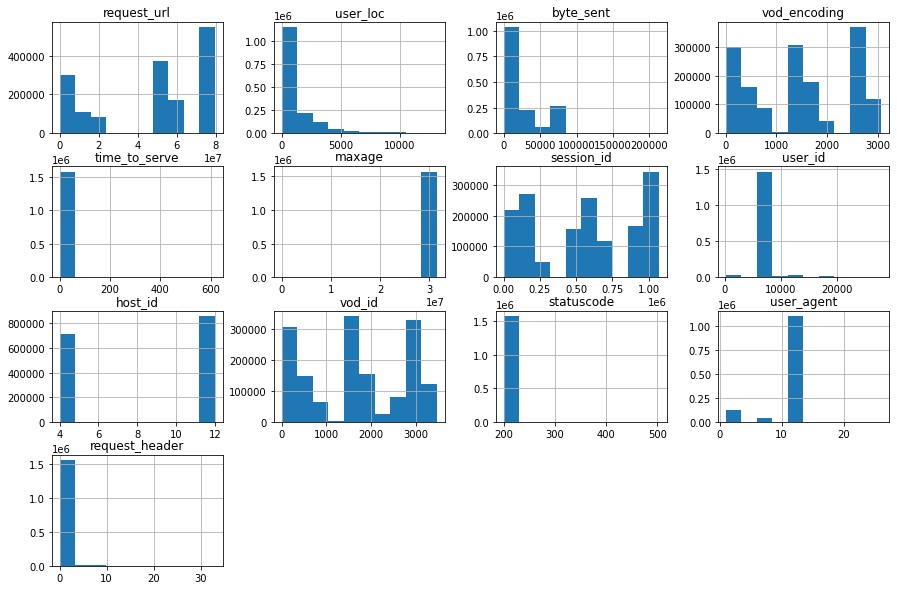

In [ ]:
data.hist(figsize=(15, 10))

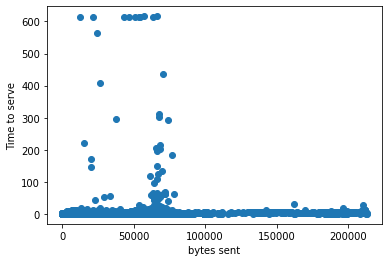

In [ ]:
x = data['byte_sent']
y = data['time_to_serve']

plt.plot(x, y, 'o')
plt.xlabel('bytes sent'), plt.ylabel('Time to serve')
plt.show()

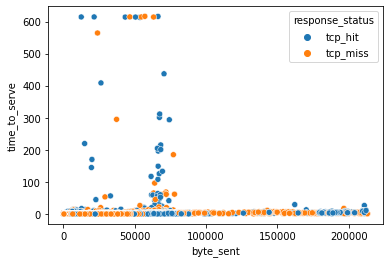

In [ ]:
sns.scatterplot(x="byte_sent", y="time_to_serve", 
                hue="response_status",data = data);

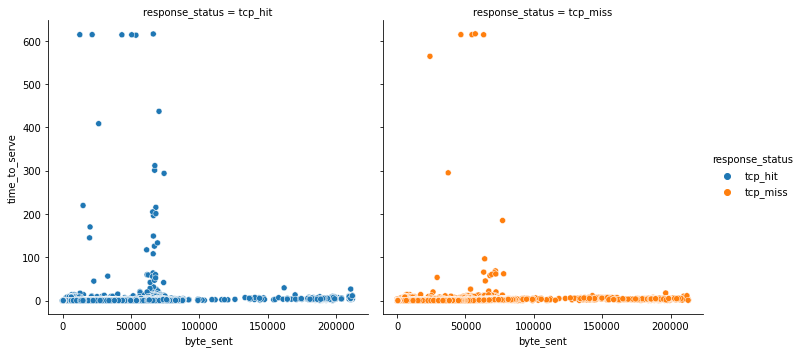

In [ ]:
sns.relplot(x="byte_sent", y="time_to_serve", hue="response_status",
            col="response_status", data=data);

In [ ]:
tcp_hit = data.loc[data['response_status'] == 'tcp_hit']
tcp_miss = data.loc[data['response_status'] == 'tcp_miss']

In [ ]:
hit_mis = data['response_status']
hit_mis.value_counts()

tcp_miss    945557
tcp_hit     631506
Name: response_status, dtype: int64

In [ ]:
tcp_mis = 945557
tcp_hit = 631506

total = tcp_mis+tcp_hit

hit_ratio = tcp_hit/total

hit_ratio

0.4004316885248085

In [ ]:
data.groupby('response_status', as_index=False)['user_id'].mean()

,response_status,user_id
0,tcp_hit,7176.034171
1,tcp_miss,7410.642152


In [ ]:
tcp_mis = 7410.642152
tcp_hit = 7176.034171

total = tcp_mis+tcp_hit

per_flow_per_user = tcp_hit/total

per_flow_per_user

0.491958141258332

In [ ]:
data['user_id'].value_counts()

7092.0     1454177
11335.0      19876
1234.0       15977
1258.0       10882
11185.0       9977
            ...   
25063.0          1
16112.0          1
23493.0          1
23489.0          1
17953.0          1
Name: user_id, Length: 1706, dtype: int64

In [ ]:
data.groupby('response_status', as_index=False)['request_url'].mean()

,response_status,request_url
0,tcp_hit,4.801884e+07
1,tcp_miss,4.741490e+07


In [ ]:
data['request_url'][data['user_id']].values[0]

57688675

In [ ]:
data.columns

Index(['request_url', 'request_method', 'time_received', 'user_loc',
       'byte_sent', 'vod_encoding', 'time_to_serve', 'maxage', 'session_id',
       'cachecontrol', 'method', 'response_status', 'user_id', 'host_id',
       'vod_id', 'statuscode', 'user_agent', 'request_header'],
      dtype='object')

In [ ]:
data['time_received']= pd.to_datetime(data['time_received'])

In [ ]:
data['time_received']

0         2021-11-14 06:00:14+00:00
1         2021-11-14 06:19:57+00:00
2         2021-11-14 06:21:14+00:00
3         2021-11-14 06:21:18+00:00
4         2021-11-14 06:22:01+00:00
                     ...           
1577058   2021-11-15 22:46:15+00:00
1577059   2021-11-15 22:47:16+00:00
1577060   2021-11-15 22:47:19+00:00
1577061   2021-11-15 22:47:30+00:00
1577062   2021-11-15 22:47:36+00:00
Name: time_received, Length: 1577063, dtype: datetime64[ns, UTC]

In [ ]:
series = data['time_received'].squeeze()

In [ ]:
series

0         2021-11-14 06:00:14+00:00
1         2021-11-14 06:19:57+00:00
2         2021-11-14 06:21:14+00:00
3         2021-11-14 06:21:18+00:00
4         2021-11-14 06:22:01+00:00
                     ...           
1577058   2021-11-15 22:46:15+00:00
1577059   2021-11-15 22:47:16+00:00
1577060   2021-11-15 22:47:19+00:00
1577061   2021-11-15 22:47:30+00:00
1577062   2021-11-15 22:47:36+00:00
Name: time_received, Length: 1577063, dtype: datetime64[ns, UTC]

In [ ]:
time = (data.groupby(['request_method','request_url', pd.Grouper(key='time_received', freq='H')])
      .size().unstack(fill_value=0)
      .reset_index()
     )

In [ ]:
date_time = data[['time_received']]

In [ ]:
date_time['ordinal'] = [x.toordinal() for x in date_time.time_received]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
date_time.head

<bound method NDFrame.head of                     time_received  ordinal
0       2021-11-14 06:00:14+00:00   738108
1       2021-11-14 06:19:57+00:00   738108
2       2021-11-14 06:21:14+00:00   738108
3       2021-11-14 06:21:18+00:00   738108
4       2021-11-14 06:22:01+00:00   738108
...                           ...      ...
1577058 2021-11-15 22:46:15+00:00   738109
1577059 2021-11-15 22:47:16+00:00   738109
1577060 2021-11-15 22:47:19+00:00   738109
1577061 2021-11-15 22:47:30+00:00   738109
1577062 2021-11-15 22:47:36+00:00   738109

[1577063 rows x 2 columns]>

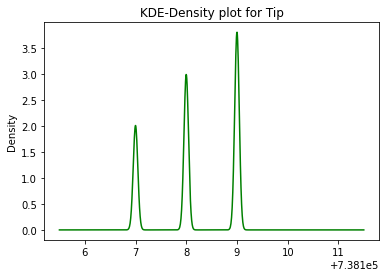

In [ ]:
date_time.ordinal.plot.kde(color='green')
plt.title('KDE-Density plot for Tip')
plt.show()

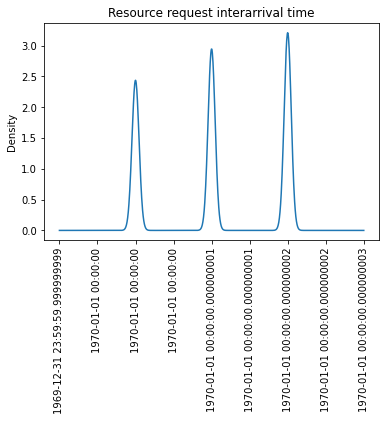

In [ ]:
fig, ax = plt.subplots()
date_time["time_received"].astype(np.int64).plot.kde(ax=ax)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
plt.title('Resource request interarrival time')
plt.show()

In [ ]:
dav=date_time['time_received'] = (date_time['time_received'] - date_time['time_received'].min())  / np.timedelta64(1,'D')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
time = date_time["time_received"].values

(array([0.1403247 , 0.10439502, 0.09482157, 0.08496725, 0.09573445,
        0.2328992 , 0.2968236 , 0.22508128, 0.24848823, 0.31393408,
        0.24577303, 0.30363502, 0.2756403 , 0.23453769, 0.32523964,
        0.40051641, 0.40994941, 0.17042604, 0.31573642, 0.39838637,
        0.47113519, 0.69240114, 0.61394102, 0.6730904 , 0.48466441,
        0.46380881, 0.56651853, 0.32371819, 0.26302395, 0.22393434,
        0.20137003, 0.18327646, 0.07757065, 0.0743639 , 0.02534973,
        0.09720908, 0.12557831, 0.13782015, 0.14507631, 0.1773545 ,
        0.16604894, 0.25148433, 0.22430885, 0.17852485, 0.1591907 ,
        0.17618415, 0.24457927, 0.20958588, 0.23989788, 0.38026939,
        0.3974735 , 0.44513006, 0.51102064, 0.26606686, 0.08475658,
        0.12246519, 0.2184337 , 0.76948024, 1.25222528, 1.18078725,
        1.08540391, 0.86320169, 0.54680988, 0.56017525, 0.28425406,
        0.28228788, 0.22428544, 0.20357029, 0.172322  , 0.17726087,
        0.08328195, 0.03157598, 0.08208819, 0.13

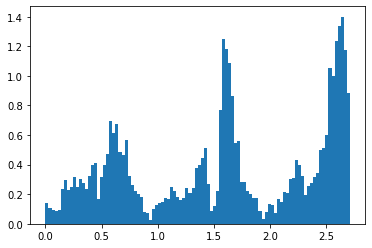

In [ ]:
plt.hist(dav, bins =100, density = True)

In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 4.7 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=6dc33ac9f7d9d6148b53b444cbbbde2dc1adfcadc705f19de64df3ace2467a2c
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=5d75b6066cf66af73ca122d0f2a2dda7a62b122dbe56c17dd6272d9ad7bdea2d
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from fitter import Fitter

In [ ]:
date_time.columns

Index(['time_received', 'ordinal'], dtype='object')

In [ ]:
dav

0          0.959144
1          0.972836
2          0.973727
3          0.973773
4          0.974271
             ...   
1577058    2.657766
1577059    2.658472
1577060    2.658507
1577061    2.658634
1577062    2.658704
Name: time_received, Length: 1577063, dtype: float64

Fitting Distribution

,sumsquare_error,aic,bic,kl_div
uniform,9.814956,203.314545,-1.890449e+07,0.307979
norm,12.058478,248.136212,-1.857983e+07,0.418075
rayleigh,12.174744,242.047965,-1.856470e+07,0.403637
logistic,12.292665,257.766806,-1.854950e+07,0.433739
gamma,inf,inf,inf,inf


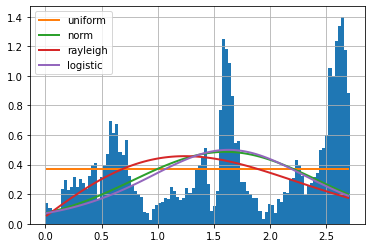

In [ ]:
dist_fitter = Fitter(dav,
                     distributions = ["uniform",
                                      "logistic",
                                      "gamma",
                                      "rayleigh",
                                      "norm"])
dist_fitter.fit()
dist_fitter.summary() 

In [ ]:
data.columns

Index(['request_url', 'request_method', 'time_received', 'user_loc',
       'byte_sent', 'vod_encoding', 'time_to_serve', 'maxage', 'session_id',
       'cachecontrol', 'method', 'response_status', 'user_id', 'host_id',
       'vod_id', 'statuscode', 'user_agent', 'request_header'],
      dtype='object')

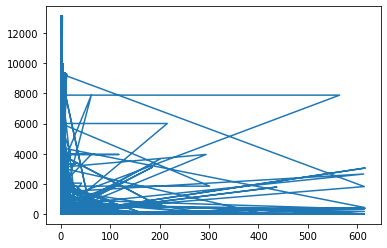

In [ ]:
from pandas.core.arrays.datetimes import DatetimeArray
x = data['time_to_serve']
y = data['user_loc']
plt.plot(x,y)
# beautify the x-labels
#plt.plot_date(price_date, price_close, linestyle='solid')
plt.show()